In [1]:
import torch
from PIL import Image

# 모델 로드
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='./models/rose.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\SSAFY/.cache\torch\hub\master.zip
YOLOv5  2023-5-1 Python-3.11.2 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 Super with Max-Q Design, 8192MiB)



requirements: C:\Users\SSAFY\.cache\torch\hub\requirements.txt not found, check failed.


Fusing layers... 
one_YOLOv5m summary: 212 layers, 20889303 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


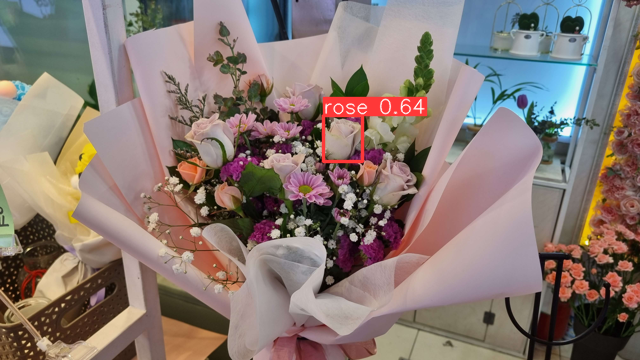

In [6]:
image_path = './x_buquet/f1.jpg'
img = Image.open(image_path)
x, y = img.size
L, M = max(x,y), min(x,y)

if x == L:
    img = img.resize([640,int(640/L * M)])
else:
    img = img.resize([int(640/L * M), 640])

result = model1(img)

filted_result = result.xyxy[0][result.xyxy[0][:, 4] > 0.6]

result.xyxy[0] = filted_result

result.show()

In [52]:
[filted_result]

[tensor([[285.28918, 168.42145, 327.29022, 208.51453,   0.87081,   7.00000]], device='cuda:0')]

In [4]:
import shutil, os

In [13]:

cnt = 0
for i in os.listdir('./0_scrapping_img'):
    num = str(cnt).rjust(4,'0')
    name = f'rose_{num}.jpg'
    os.rename(f'./0_scrapping_img/{i}', f'./0_scrapping_img/{name}')
    cnt += 1

In [3]:
import cv2

In [97]:
import cv2
import numpy as np

# 이미지 파일을 읽기
image = cv2.imread('./0_scrapping_img/rose_0030.jpg')

image = cv2.resize(image, (640, 640))

# 이미지를 HSV 색 공간으로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 꽃 색상 범위 정의
lower_color = np.array([0, 0, 175])
upper_color = np.array([180, 120, 255])

# 색상 범위에 따른 마스크 생성
mask = cv2.inRange(hsv, lower_color, upper_color)

# 마스크에서 객체의 윤곽선 검출
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 윤곽선을 바탕으로 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 이미지 표시
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()